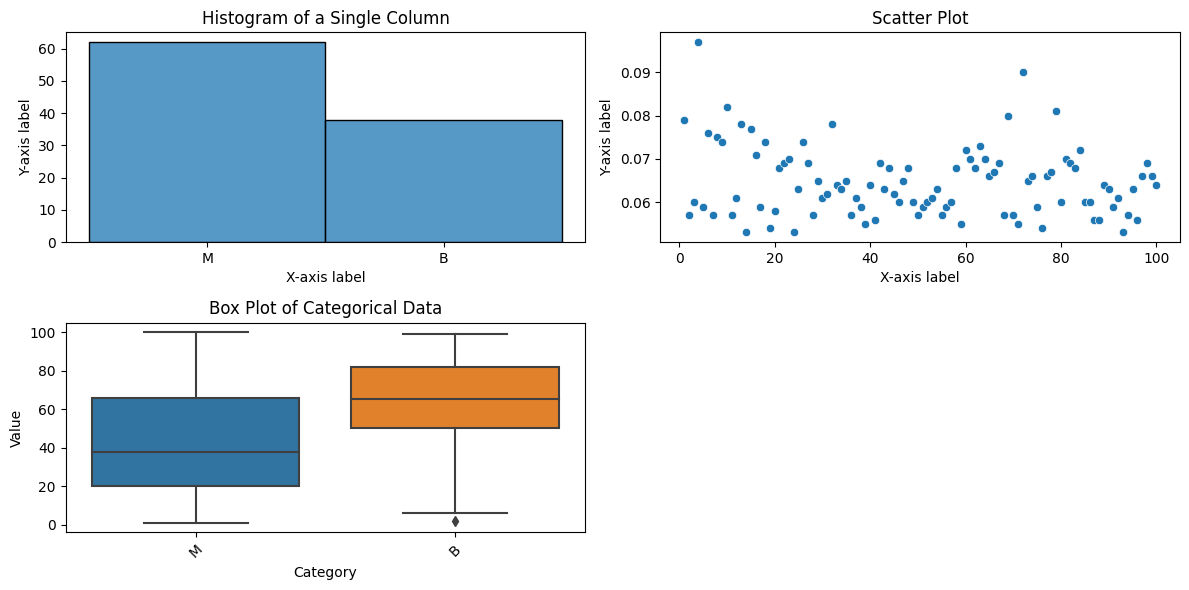

In [ ]:
#Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Prostate_cancer.csv')

#set a common figure size for all plots
plt.figure(figsize=(12, 6))

#Histogram
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='diagnosis_result')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of a Single Column')

#Scatter plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='id', y='fractal_dimension')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot')

#Box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='diagnosis_result', y='id')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Box Plot of Categorical Data')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [ ]:
#Data Cleaning
import pandas as pd
import numpy as np

df = pd.read_csv('Prostate_cancer.csv')

#handling missing values
df.dropna(inplace=True) #remove rows with missing values

#removing duplicate rows
df.drop_duplicates(inplace=True)

print(df.head())
print(df.info())

Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, compactness, symmetry, fractal_dimension, Unnamed: 10]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 0 non-null      int64  
 1   diagnosis_result   0 non-null      object 
 2   radius             0 non-null      int64  
 3   texture            0 non-null      int64  
 4   perimeter          0 non-null      int64  
 5   area               0 non-null      int64  
 6   smoothness         0 non-null      float64
 7   compactness        0 non-null      float64
 8   symmetry           0 non-null      float64
 9   fractal_dimension  0 non-null      float64
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(5), int64(5), object(1)
memory usage: 0.0+ bytes
None


In [ ]:
#Data Normalization
import pandas as pd

csv_file = 'Prostate_cancer.csv'
df = pd.read_csv(csv_file)

columns_to_normalize = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']

#min-max scaling
for column in columns_to_normalize:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)

#Z-score normalization
for column in columns_to_normalize:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = (df[column] - mean) / std

normalized_csv_file = 'normalized_data.csv'
df.to_csv(normalized_csv_file, index=False)

print(f"Normalized data saved to {normalized_csv_file}")


Normalized data saved to normalized_data.csv


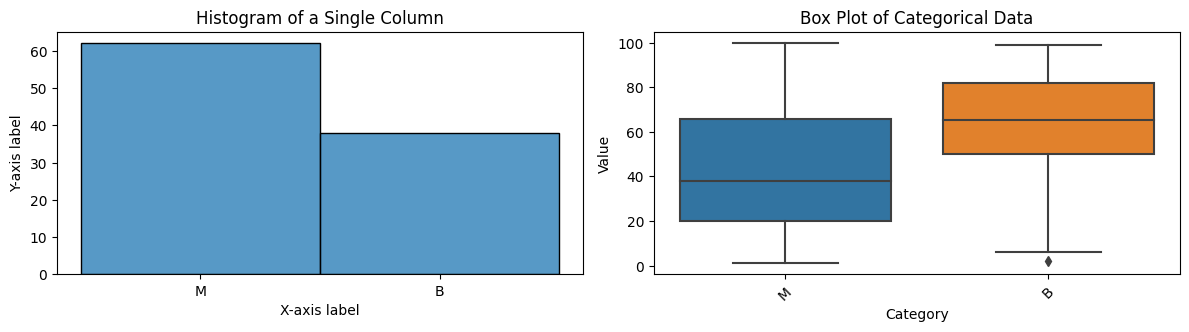

In [ ]:
#Data Visualization (Of Normalized Data)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('normalized_data.csv')

#set a common figure size for all plots
plt.figure(figsize=(12, 6))

#Histogram
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='diagnosis_result')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of a Single Column')

#Box plot
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='diagnosis_result', y='id')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Box Plot of Categorical Data')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [ ]:
#Data Transformation
import pandas as pd

csv_file = 'normalized_data.csv'
df = pd.read_csv(csv_file)

categorical_columns = ['diagnosis_result']

#perform encoding for the selected categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

transformed_csv_file = 'transformed_data.csv'
df_encoded.to_csv(transformed_csv_file, index=False)

print(f"Transformed data saved to {transformed_csv_file}")


Transformed data saved to transformed_data.csv


Dataset : (100, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(5), int64(5), object(1)
memory usage: 8.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------

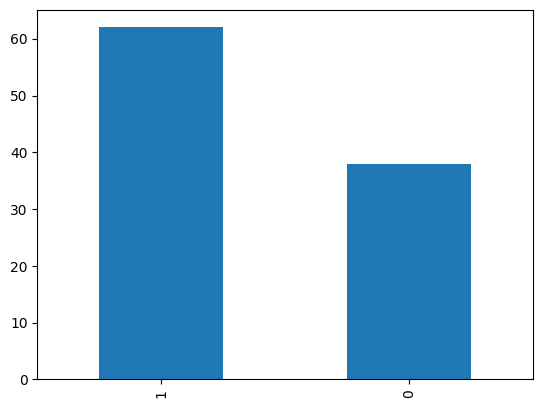

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


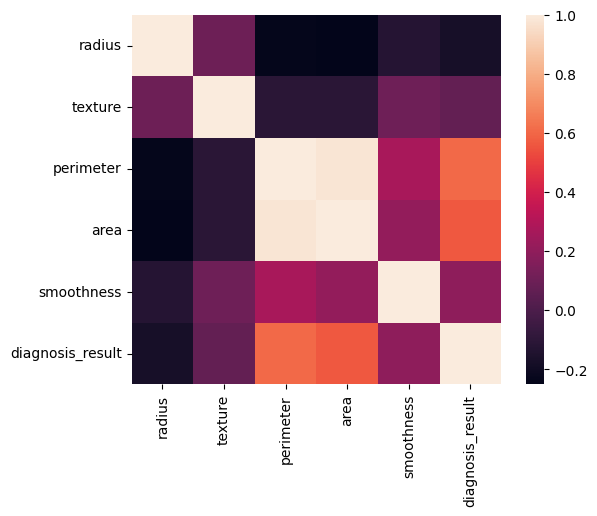

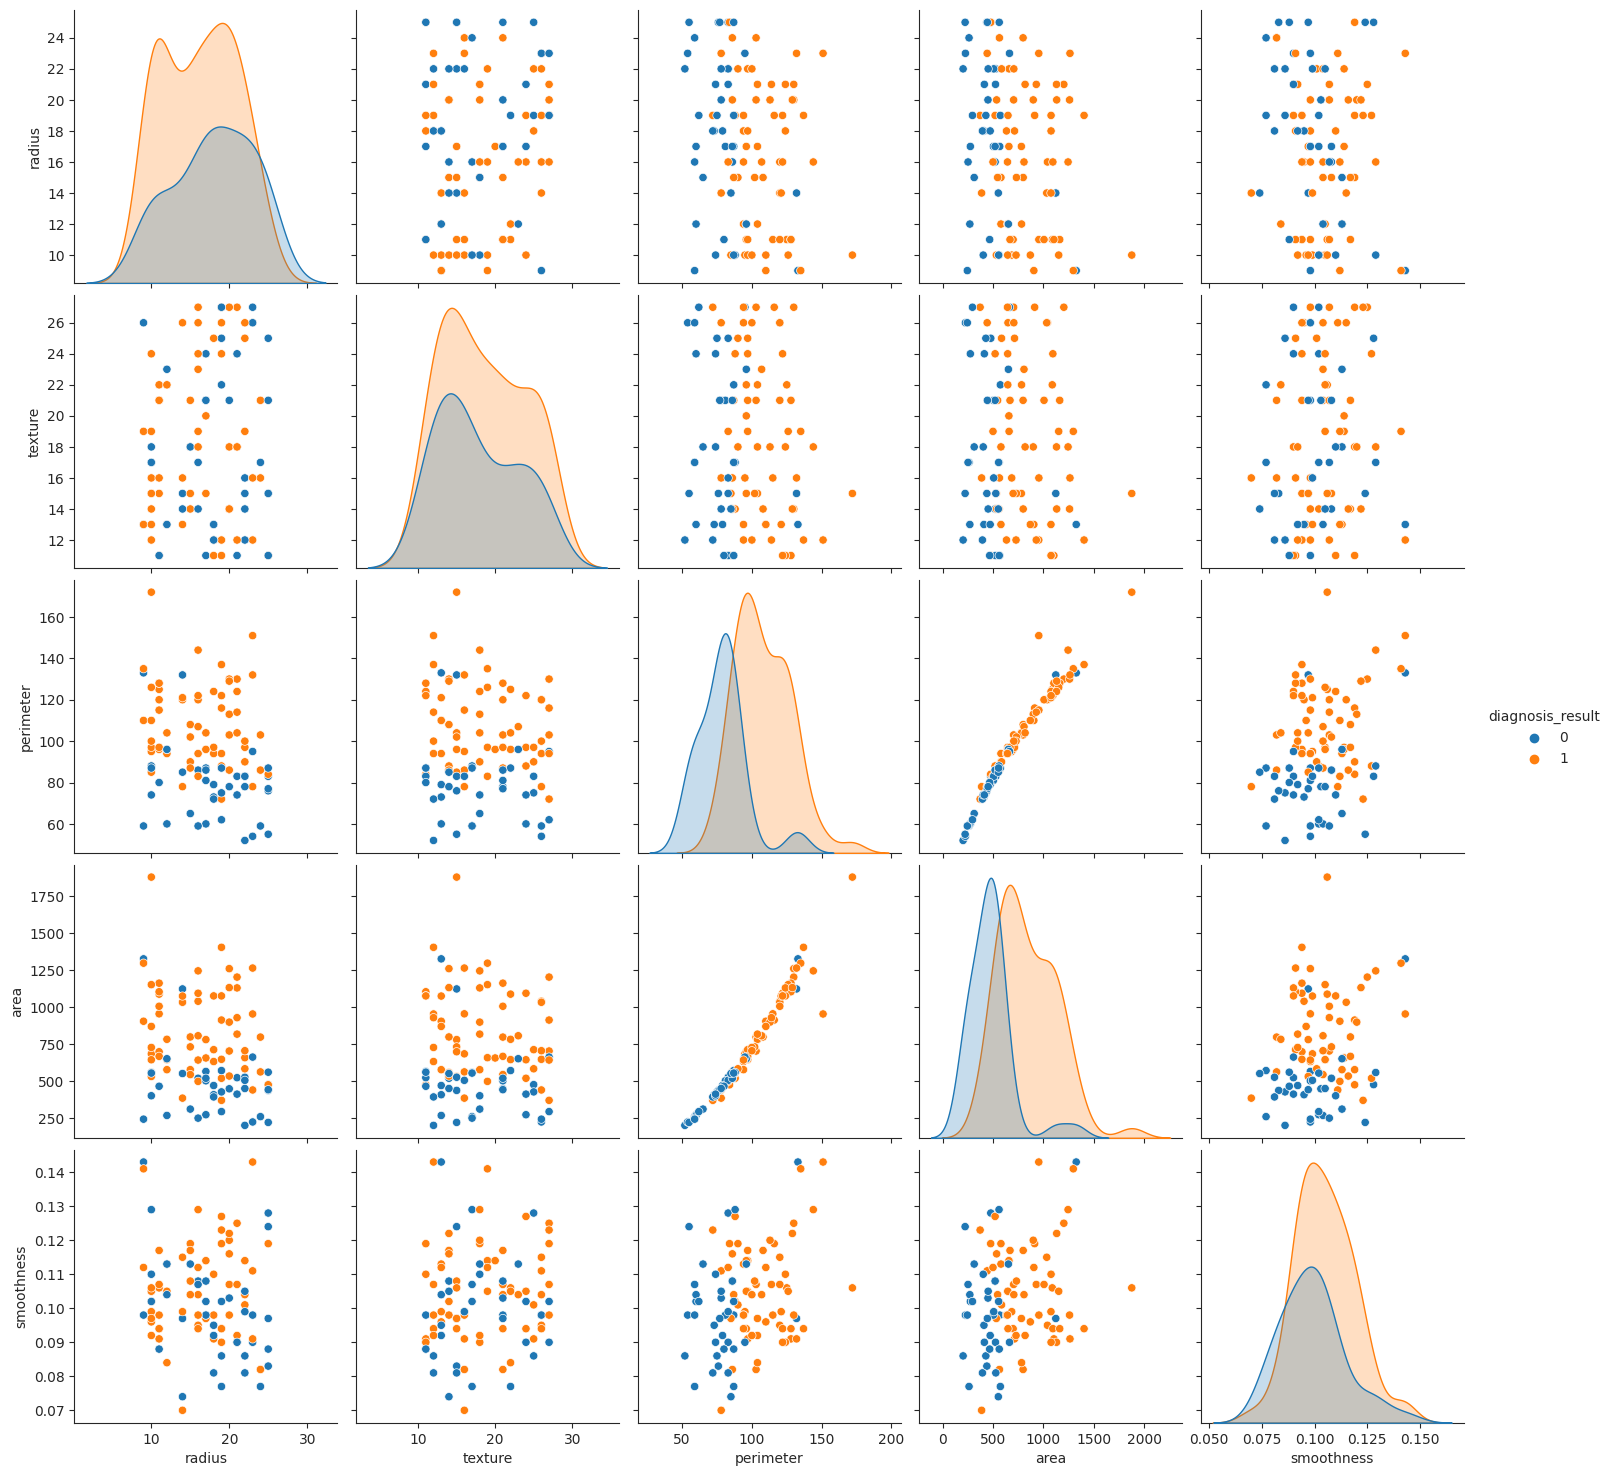

X train shape:  (80, 5)
Y train shape:  (80,)
X test shape:  (20, 5)
Y test shape:  (20,)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Prostate_cancer.csv')
print('Dataset :',df.shape)
x = df.iloc[:, [0, 1, 2, 3]].values
df.info()
df[0:10]

df['diagnosis_result'] = df['diagnosis_result'].replace(['B'],'0')
df['diagnosis_result'] = df['diagnosis_result'].replace(['M'],'1')

df[['diagnosis_result']] = df[['diagnosis_result']].apply(pd.to_numeric, errors ='ignore')
df.info()

df['diagnosis_result'].value_counts()

df.diagnosis_result.value_counts()[0:30].plot(kind='bar')
plt.show()

df = df[['radius','texture','perimeter','area', 'smoothness','diagnosis_result']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True)

sns.set_style("ticks")
sns.pairplot(df,hue="diagnosis_result",size=3);
plt.show()

from sklearn.model_selection import train_test_split
Y = df['diagnosis_result']
X = df.drop(columns=['diagnosis_result'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)


Accuracy: 0.75
Confusion Matrix:
[[ 4  0]
 [ 5 11]]


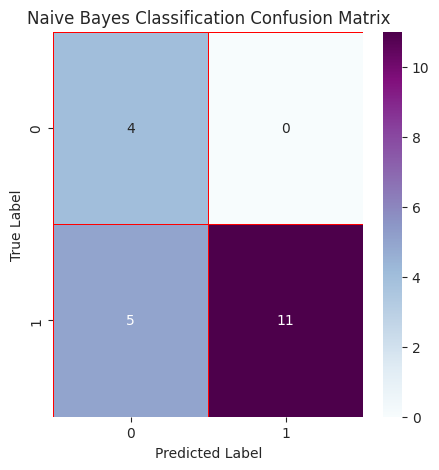

In [ ]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Naive Bayes model
nbcla = GaussianNB()
nbcla.fit(X_train, Y_train)

# Make predictions on the test set
Y_predict = nbcla.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(Y_test, Y_predict)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate and print the confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict)
print('Confusion Matrix:')
print(nbcla_cm)

# Display confusion matrix as a figure
plt.figure(figsize=(5, 5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


X train shape:  (80, 5)
Y train shape:  (80,)
X test shape:  (20, 5)
Y test shape:  (20,)
Accuracy: 0.80


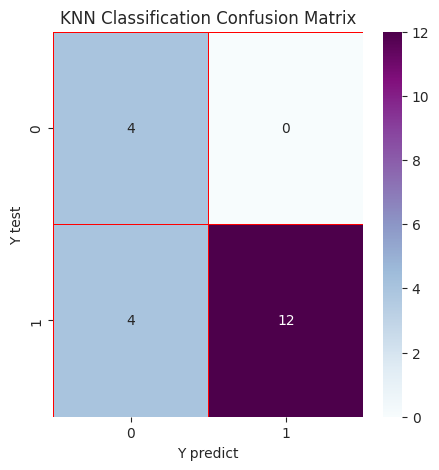

In [ ]:
#KNN Algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

# Print the shapes of the training and testing sets
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

# Create and train the KNN model
knncla = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knncla.fit(X_train, Y_train)

# Make predictions on the test set
Y_predict = knncla.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(Y_test, Y_predict)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate and plot the confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
